In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2025-06-25 14:03:06.588432: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750874586.600784  181655 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750874586.605081  181655 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750874586.616324  181655 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750874586.616336  181655 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750874586.616338  181655 computation_placer.cc:177] computation placer alr

In [15]:
# Load in the data
# data = np.load('../data/segmentedPose.npy')
data = np.load('../data/segmentedPose_augmented.npy')
X = data[:,0:-1]
y = data[:,-1].astype(int)

In [16]:
# Constants
NUM_CLASSES = 8
NUM_FEATURES = len(data[0]) - 1

# Convert y to categorical data
y = to_categorical(y, num_classes=NUM_CLASSES)

In [17]:
# Get training and test splits
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=67)

In [18]:
# Create the model
# model = tf.keras.Sequential([
#     tf.keras.layers.Input(shape=(NUM_FEATURES,)),
#     tf.keras.layers.Dense(128),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.ReLU(),
#     tf.keras.layers.Dropout(0.3),
#     tf.keras.layers.Dense(64),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.ReLU(),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(NUM_FEATURES,)),
    tf.keras.layers.Dense(256),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),

    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])


In [19]:
# Compile the optimizer and model
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    # initial_learning_rate=0.0003,
    decay_steps=100,
    decay_rate=0.95
)
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,             # Wait 10 epochs with no improvement
    restore_best_weights=True,  # Restore the best weights (not the last ones)
    verbose=1
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,       # Reduce learning rate by half
    patience=5,       # Wait 5 epochs with no improvement
    min_lr=1e-6,      # Don't go below this learning rate
    verbose=1
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [20]:
# model.compile(
#     optimizer=optimizer,
#     loss='categorical_crossentropy',
#     callbacks=[early_stop, reduce_lr],
#     metrics=[
#         'accuracy',
#         tf.keras.metrics.Precision(name='precision'),
#         tf.keras.metrics.Recall(name='recall')
#     ]
# )

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [21]:
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, batch_size=128, callbacks=[early_stop, reduce_lr],)
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=250, batch_size=32)

Epoch 1/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2509 - loss: 2.0079 - precision: 0.3742 - recall: 0.0363

2025-06-25 14:10:40.268895: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_123_0', 116 bytes spill stores, 116 bytes spill loads

2025-06-25 14:10:40.542561: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_123_0', 128 bytes spill stores, 128 bytes spill loads

2025-06-25 14:10:40.699093: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_123', 120 bytes spill stores, 120 bytes spill loads

2025-06-25 14:10:42.226796: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_123', 24 bytes spill stores, 24 bytes spill loads

2025-06-25 14:10:42.263825: I exte

67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.2517 - loss: 2.0057 - precision: 0.3761 - recall: 0.0367 - val_accuracy: 0.1435 - val_loss: 3.7504 - val_precision: 0.1977 - val_recall: 0.0952 - learning_rate: 0.0010
Epoch 2/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4105 - loss: 1.6032 - precision: 0.6583 - recall: 0.1377 - val_accuracy: 0.2999 - val_loss: 1.8277 - val_precision: 0.5143 - val_recall: 0.0198 - learning_rate: 0.0010
Epoch 3/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5052 - loss: 1.3402 - precision: 0.7269 - recall: 0.2552 - val_accuracy: 0.3045 - val_loss: 1.8479 - val_precision: 0.4948 - val_recall: 0.1446 - learning_rate: 0.0010
Epoch 4/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5730 - loss: 1.1777 - precision: 0.7307 - recall: 0.3583 - val_accuracy: 0.4088 - val_loss: 1.6364 - val_precision: 0.6423 - val_recall: 0.2173 - learning_rate: 0.0010
Epoch 5/150
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5993 - loss: 

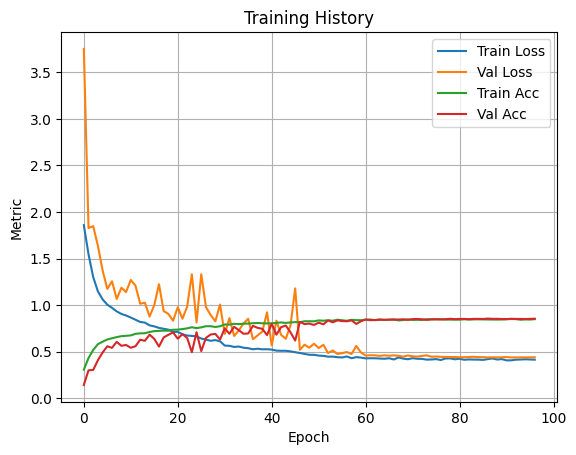

In [22]:
# Plot a training history graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
# plt.plot(history.history['precision'], label='Precision')
# plt.plot(history.history['recall'], label='Recall')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.title('Training History')
plt.grid(True)
plt.show()